### Creating a simple bar plot to show imbalances of the models
The gloabl mean TOA radiation values for CERES are plotted from 2001 to 2021. You can choose which year of the simulatiom should be plotted.

In [2]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import barplot_model_data

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [5]:
lumi=True

In [8]:
if lumi:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'historical-1990-devcon' , source = 'lra-r100-monthly')
else:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')
    ifs_9km = process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')
    icon = process_model_data(model =  'ICON' , exp = 'ngc3028' , source = 'lra-r100-monthly')
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly")
era5 = process_model_data(model = 'ERA5', exp = 'era5', source = 'monthly')

2023-10-17 21:54:08 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-17 21:54:08 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-17 21:54:08 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-17 21:54:08 :: Reader :: WARNING  -> Would be safer to run with fix=False
/LUMI_TYKKY_PuGxLUy/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


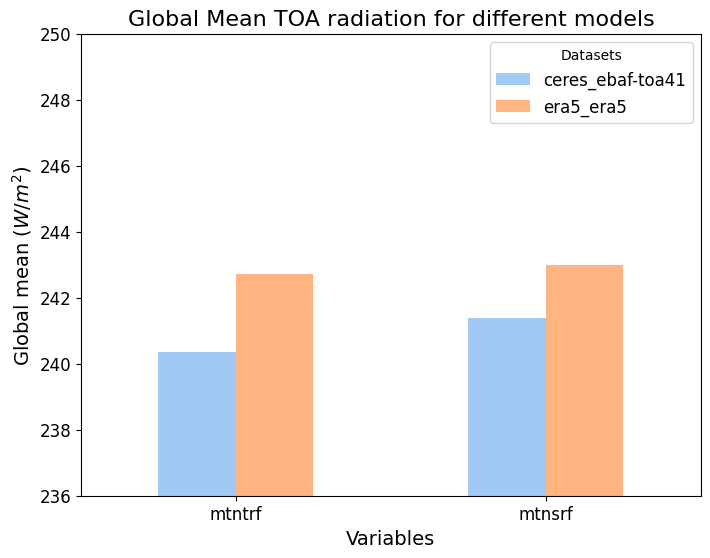

In [17]:
if lumi:
    datasets = [ceres, era5]
else:
    datasets = [ceres, icon, ifs_4km, ifs_9km] 
model_names = None # ['ceres', 'icon', 'ifs 4.4 km', 'ifs 9 km']
barplot_model_data(datasets, model_names)

A similar method will be introduced in the upcomming version of this diagnostic. This will include a boxplot showing more statistics such as median, quantiles, etc.